# For looking at Labels

In [ ]:
from dataset import AlbumDataset, spher_to_cart
from torch.utils.data import DataLoader

train_album_path = '/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm/album_RNO4_train.hdf5'

# Load Datasets
# album = AlbumDataset(album_path, transform=None, target_transform=None)

# test_album_norm_factors: [-4.812802314758301,1236.3431396484375,14.210803985595703,1237.897216796875,-850.2981567382812,443.872314453125]
# train_album_norm_factors: [1.8211910724639893,1229.3675537109375,15.867149353027344,1235.3389892578125,-853.52490234375,446.32781982421875]

train_album = AlbumDataset(train_album_path, transform=None, target_transform=spher_to_cart,normalize_labels=True)
data_loader = DataLoader(dataset = train_album, batch_size = 1, shuffle = True)

r_arr = []
theta_arr = []
phi_arr = []

for idx, (x, label) in enumerate(data_loader):
    label = train_album.denormalize_label(label)
    print(f'\r Progress: {idx+1}/{len(train_album)}',end='', flush=True)
    r,theta,phi = label[0]


    r_arr.append(r)
    theta_arr.append(theta)
    phi_arr.append(phi)
    if idx == 500:
        break


Computing normalization statistics...
Compounding statistics... (63319/63320)Normalization stats computed:
  r:     mean=1.8212, std=1229.3676
  theta: mean=15.8671, std=1235.3390
  phi:   mean=-853.5249, std=446.3278
[1.8211910724639893,1229.3675537109375,15.867149353027344,1235.3389892578125,-853.52490234375,446.32781982421875]
 Progress: 501/63320

In [2]:
import numpy as np
r_arr_mean = np.mean(r_arr)
r_arr_std = np.std(r_arr)

theta_arr_mean = np.mean(theta_arr)
theta_arr_std = np.std(theta_arr)

phi_arr_mean = np.mean(phi_arr)
phi_arr_std = np.std(phi_arr)

print(r_arr_mean,theta_arr_mean,phi_arr_mean)

0.08114838 0.006697531 0.08666923


In [3]:
r_arr_z = (r_arr - r_arr_mean) / r_arr_std
theta_arr_z = (theta_arr - theta_arr_mean) / theta_arr_std
phi_arr_z = (phi_arr - phi_arr_mean) / phi_arr_std


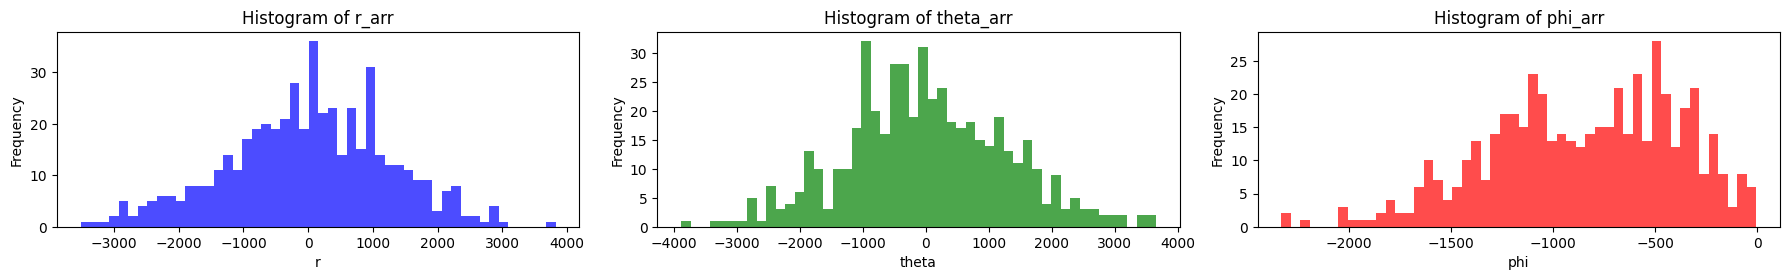

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))

plt.subplot(2, 3, 1)
plt.hist(r_arr, bins=50, alpha=0.7, color='blue')
plt.title('Histogram of r_arr')
plt.xlabel('r')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(theta_arr, bins=50, alpha=0.7, color='green')
plt.title('Histogram of theta_arr')
plt.xlabel('theta')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(phi_arr, bins=50, alpha=0.7, color='red')
plt.title('Histogram of phi_arr')
plt.xlabel('phi')
plt.ylabel('Frequency')

# plt.subplot(2, 3, 4)
# plt.hist(r_arr_z, bins=50, alpha=0.7, color='blue')
# plt.title('Histogram of z_r_arr')
# plt.xlabel('z_r')
# plt.ylabel('Frequency')

# plt.subplot(2, 3, 5)
# plt.hist(theta_arr_z, bins=50, alpha=0.7, color='green')
# plt.title('Histogram of z_theta_arr')
# plt.xlabel('z_theta')
# plt.ylabel('Frequency')

# plt.subplot(2, 3, 6)
# plt.hist(phi_arr_z, bins=50, alpha=0.7, color='red')
# plt.title('Histogram of z_phi_arr')
# plt.xlabel('z_phi')
# plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# For looking at images...

In [5]:
from dataset import AlbumDataset

train_album_path = '/data/i3store/users/ssued/albums/RNO_album_11_03_2025_20k_unorm/album_RNO4.hdf5'

# Load Datasets
# album = AlbumDataset(album_path, transform=None, target_transform=None)
dataset = AlbumDataset(train_album_path, transform=None, target_transform=None,normalize_labels=False)


In [6]:
import numpy as np
max_binned_hilb_v_arr = []
for idx, (x, label) in enumerate(dataset):
    print(f'\r Looking at {idx}/{len(dataset)}',end='')
    max_binned_hilb_v_arr.append(np.max(x.numpy()))


 Looking at 11619/79150

KeyboardInterrupt: 

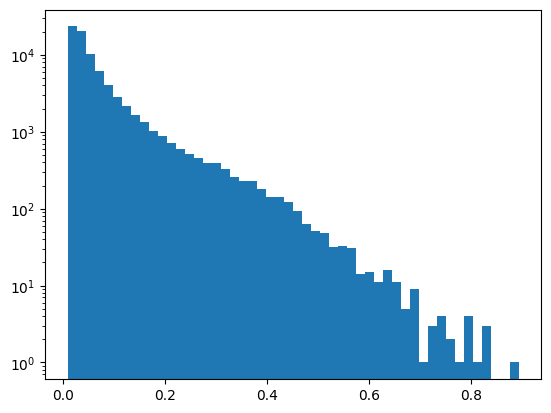

In [ ]:
import matplotlib.pyplot as plt

plt.hist(max_binned_hilb_v_arr,bins=50)
plt.yscale('log')

Good! No voltage above 1V! 